In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [26]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

columns = [
    'Pregnancies','Glucose','BloodPressure','SkinThickness',
    'Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome'
]

data = pd.read_csv(url, names=columns)


In [27]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [28]:
cols_with_zero = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

data[cols_with_zero] = data[cols_with_zero].replace(0, np.nan)
data = data.fillna(data.median())

assert data.isnull().sum().sum() == 0


In [29]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']


In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [32]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=7),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=6),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(kernel='rbf')
}


In [33]:
accuracies = []

for model in models.values():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))


In [34]:
for name, acc in zip(models.keys(), accuracies):
    print(f"{name}: {acc*100:.2f}%")


Logistic Regression: 74.03%
KNN: 72.73%
Decision Tree: 73.59%
Random Forest: 74.46%
Naive Bayes: 74.03%
SVM: 74.46%


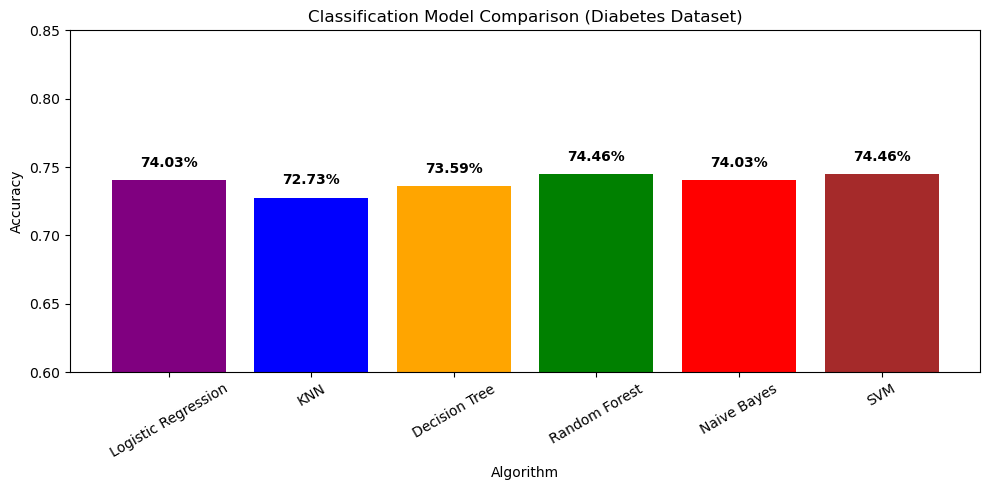

In [35]:
plt.figure(figsize=(10,5))

bars = plt.bar(
    models.keys(),
    accuracies,
    color=['purple','blue','orange','green','red','brown']
)

plt.ylim(0.6, 0.85)
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.title("Classification Model Comparison (Diabetes Dataset)")

for bar, acc in zip(bars, accuracies):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 0.01,
        f"{acc*100:.2f}%",
        ha='center',
        fontweight='bold'
    )

plt.xticks(rotation=30)
plt.tight_layout()
plt.show()
